# Final Report

Transplant the necessary code from `eda.ipynb` to this notebook, and clean everything up for presentation!

In [1]:
import pandas as pd                            #labeling pandas as pd for ease of use throughout the code
import matplotlib.pyplot as plt
import datetime

First thing to do is import all the necessary libraries for this dataset to be read and manipulated.  We're using pandas, matplotlib and datetime libraries.  We use the pandas to manipulate the dataset, we're using matplotlib to help us with our plotting and datetime to format the date column as a datetime format.

## Reading in the airline csv file and converting the date column to date-time

In [2]:
airline_delays = pd.read_csv('data/airline_delays_1_year.csv')
airline_delays['date'] = pd.to_datetime(airline_delays['date'], format='%b-%Y')               # converting the date column from an object into datetime format

Next we import the contents of the airline_delays csv by running the read_csv() method and storing it in the dataframe named airline_delays.  This dataframe consists thousands of rows and 20 columns.

## Showing what the dataset looks like

In [3]:
airline_delays.head(10)

,date,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2021-01-01,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",110.0,1.0,0.63,0.00,0.38,0.00,0.00,2.0,0.0,32.0,20.0,0.0,12.0,0.0,0.0
1,2021-01-01,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",87.0,9.0,3.53,0.89,3.58,0.00,1.00,0.0,1.0,452.0,174.0,32.0,208.0,0.0,38.0
2,2021-01-01,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",79.0,7.0,3.87,1.00,2.13,0.00,0.00,0.0,0.0,969.0,351.0,541.0,77.0,0.0,0.0
3,2021-01-01,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,12.0,5.28,1.00,2.23,0.00,3.50,0.0,0.0,1093.0,247.0,519.0,49.0,0.0,278.0
4,2021-01-01,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",107.0,10.0,4.12,0.00,5.88,0.00,0.00,0.0,0.0,430.0,289.0,0.0,141.0,0.0,0.0
5,2021-01-01,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",5358.0,391.0,114.05,13.71,144.70,0.86,117.68,3.0,1.0,35063.0,16409.0,2003.0,7115.0,75.0,9461.0
6,2021-01-01,9E,Endeavor Air Inc.,ATW,"Appleton, WI: Appleton International",167.0,17.0,2.67,2.00,10.41,0.00,1.91,0.0,1.0,1928.0,581.0,922.0,277.0,0.0,148.0
7,2021-01-01,9E,Endeavor Air Inc.,AVL,"Asheville, NC: Asheville Regional",141.0,5.0,1.03,1.97,1.00,0.00,1.00,0.0,0.0,740.0,69.0,611.0,33.0,0.0,27.0
8,2021-01-01,9E,Endeavor Air Inc.,AZO,"Kalamazoo, MI: Kalamazoo/Battle Creek Internat...",95.0,9.0,3.97,1.00,4.03,0.00,0.00,0.0,0.0,1062.0,891.0,66.0,105.0,0.0,0.0
9,2021-01-01,9E,Endeavor Air Inc.,BDL,"Hartford, CT: Bradley International",143.0,20.0,5.31,0.00,13.69,0.00,1.00,0.0,0.0,880.0,497.0,0.0,349.0,0.0,34.0


## Here we see how many rows we're dealing with

In [4]:
print('Number of Rows: ' + str(len(airline_delays)))

Number of Rows: 18624


We use the print() function to print the string 'Number of Rows', followed by the number of rows in the dataset.  Here we're working with 18,000+ rows of data.  We use the len() function to tell us the number of rows in the dataframe and that result gets printed.

## Dropping in null value rows

In [5]:
df = airline_delays.dropna(how='any', subset=['arr_flights'])              # removing null values in the arriving flights column and renaming the airline_delays dataframe into df for ease of use

Here we're using the dropna() parameter to lose any rows where the arr_flights column has a zero value.  This is telling us that for that month, that specific carrier had zero delays into that specific airport.

## Showing that we dropped some rows with the previous code

In [6]:
print('Number of Rows: ' + str(len(df)))

Number of Rows: 18571


After doing using the code from above, we see that we've lost 53 rows of data.  Now moving forward, any data we use, we know that there are no empty values in the arriving flights column.

## Checking to see if there are any empty values on the arriving flights column

In [7]:
null_df = pd.DataFrame(df.isnull().sum(), columns=['Count of Nulls'])  #There can be a null value under arr_del15.  That's just saying that there were no delays for that carrier in that month.
null_df.index.name = 'Column'
null_df.sort_values('Count of Nulls', ascending=False, inplace=True)
null_df.head(12)

,Count of Nulls
Column,
arr_del15,6
date,0
late_aircraft_ct,0
security_delay,0
nas_delay,0
weather_delay,0
carrier_delay,0
arr_delay,0
arr_diverted,0


This shows us what the code dropna() code has done.  We had 53 rows with no values in the arriving flights column, so now that data has been cleaned up and is displaying 0 for everything but arr_del15.  All that is showing us is that there are 6 rows showing zeroes in their arrival delays columns.

## This is a pie chart showing the Top Airports with the most arrivals

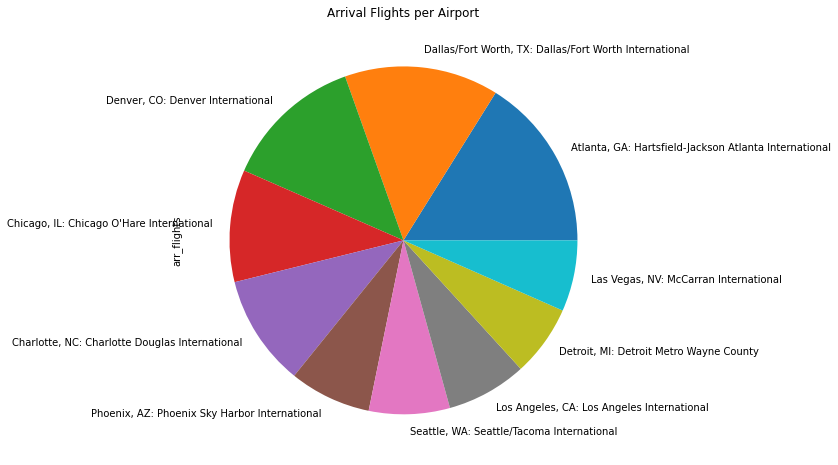

In [8]:
ax = (
    df
    .groupby('airport_name')
    .arr_flights
    .sum()                      # adding up the arrival flights by airport name to use in the pie chart
    .sort_values(ascending=False) 
    .head(10) 
    .plot(
        kind='pie',
        figsize=(20,8),
        title='Arrival Flights per Airport',
    )
)

Using the matplotlib axes subplot, we use the code above to display a pie chart showing the Top 10 busiest airports in regards to arrivals.  We use .groupby().arr_flights to pick the specific data we need to display the pie chart.  We use the sum() function to add up each airports arrivals, then the sort_values() to show us the airports with the highest values.  Using head() we display only the Top 10 and the plot() with the figsize() and title.

## A pivot table showing the number of delays per month per carrier

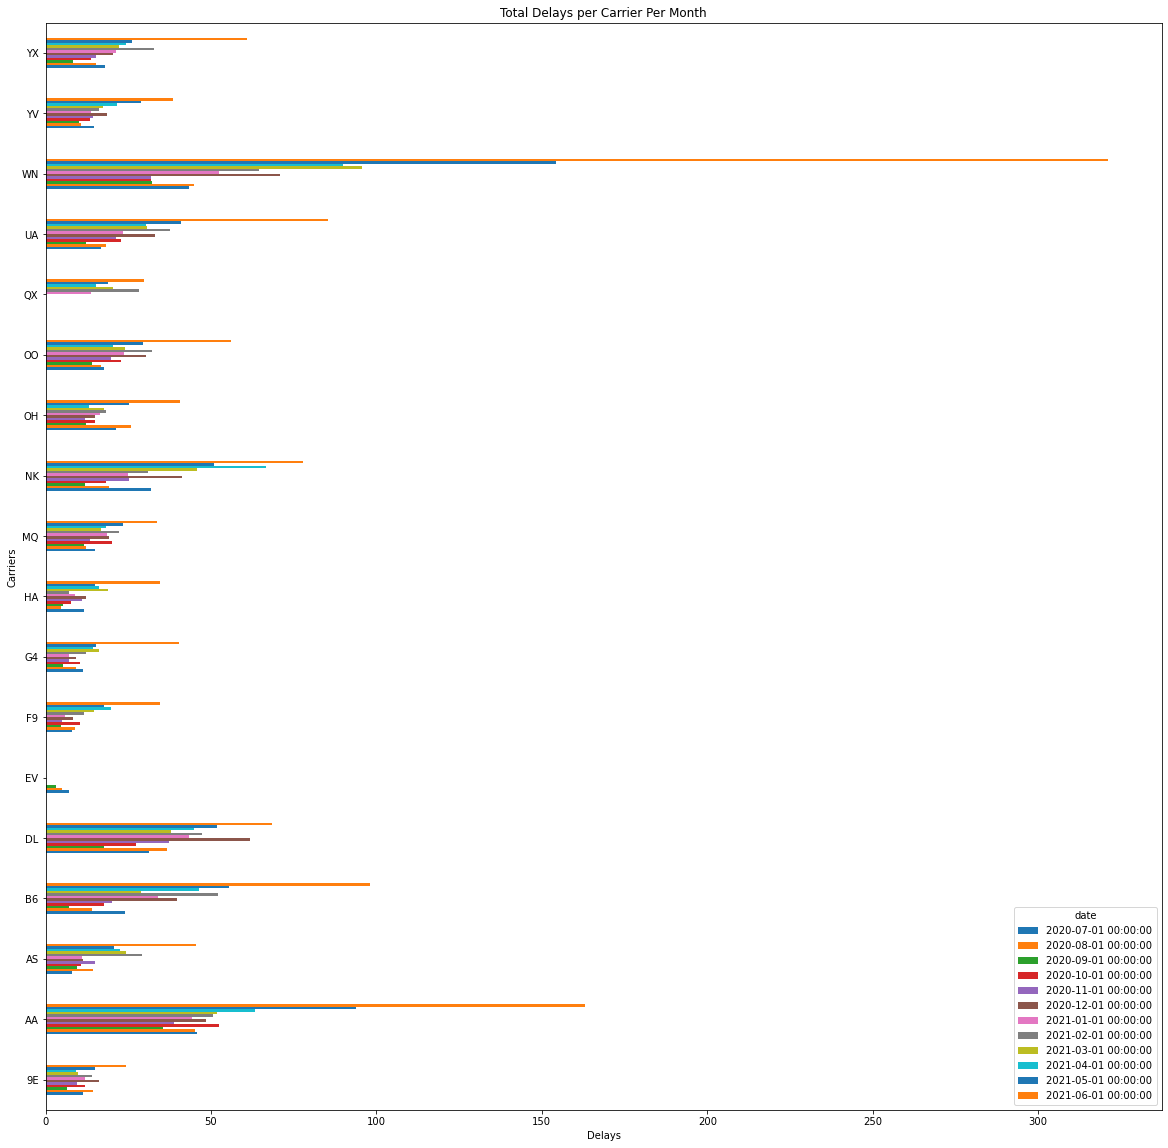

In [9]:
carrier_delay_by_month = pd.pivot_table(df, index="carrier", columns="date", values="arr_del15")

carrier_delay_by_month.plot(kind='barh', figsize=(20,20));

plt.xlabel('Delays')
plt.ylabel('Carriers')
plt.title('Total Delays per Carrier Per Month');

This pivot table is created by using the index of carrier and the date column, along with the arr_del15 column, to display the amount of delays per carrier throughout the period of one year in the dataset.  We use xlabel, ylabel and title to properly label the axes on the chart.  We use a horizontal bar graph here to display the data.

## Showing the comparison of how many arriving flights to delayed flights.

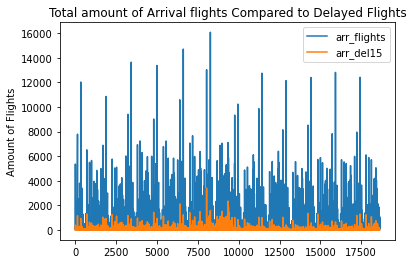

In [10]:
delay_df = df[['arr_flights', 'arr_del15']]  # creating a new variable, delay_df, and using that dataframe to plot the comparison
delay_df.plot();


plt.ylabel('Amount of Flights')
plt.title('Total amount of Arrival flights Compared to Delayed Flights');

This is a plot showing the total amount of Arrival Flights Compared to Delayed Flights.  We enter in the df[['arr_flights', 'arr_del15']] columns and save that as delay_df.  Then we plot using delay_df.plot(), showing us a rough view of the comparison of arriving flights to delayed flights.  We use plt.ylabel and plt. xlabel to properly label the bar chart.

## Showing the total number of arrival and delays

In [11]:
total_flights = df['arr_flights'].sum()
print(f'The total amount of incoming flights is {total_flights}.')

total_delays = df['arr_del15'].sum()
print(f'The total amount of delayed flights is {total_delays}.')

The total amount of incoming flights is 4771457.0.
The total amount of delayed flights is 545569.0.


This code shows the total amount of incoming flights and delayed flights.  There was a total of 4,771,457 incoming flights and 545,569 delayed.  We do this by calling the arr_flights and arr_del15 columns and using the .sum() function.  We then print out the result using the print() function.

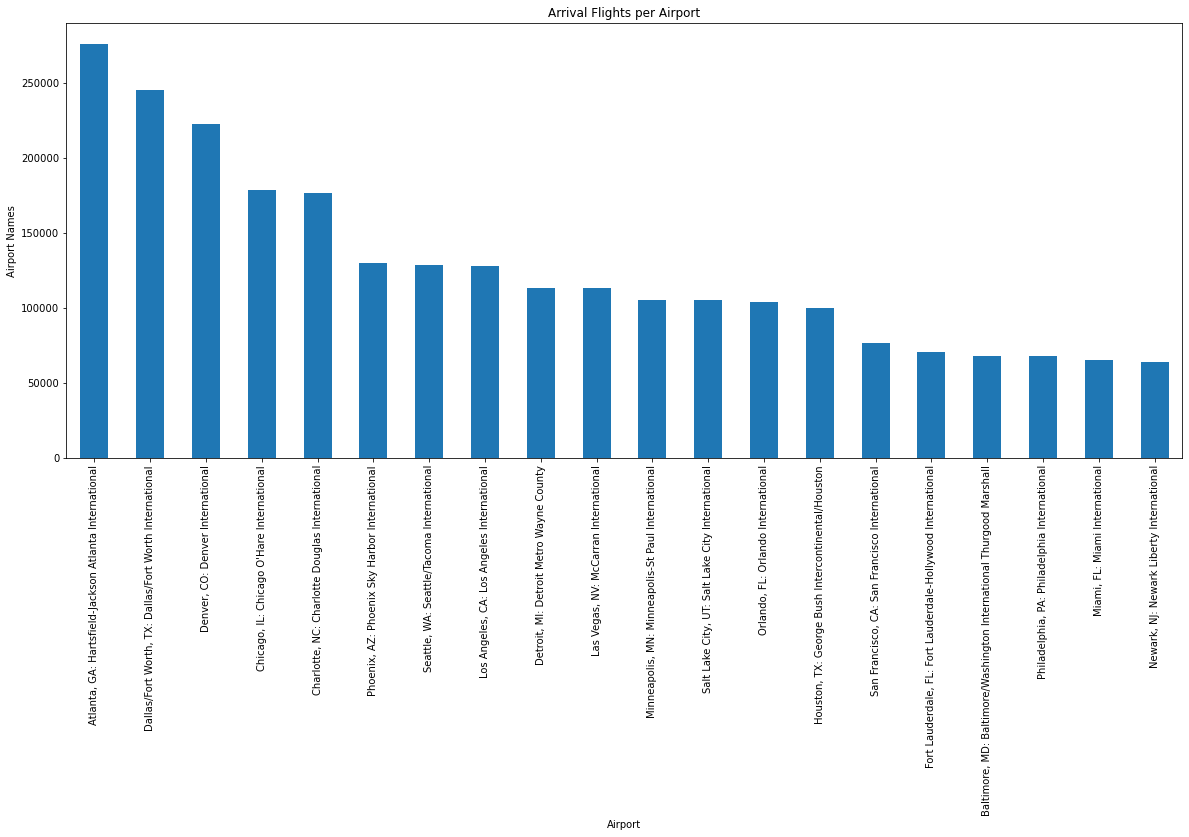

In [12]:
ax = (
    df
    .groupby('airport_name')
    .arr_flights
    .sum() 
    .sort_values(ascending=False) 
    .head(20) 
    .plot(
        kind='bar',
        figsize=(20,8),
        title='Arrival Flights per Airport',
    )
)

ax.set_xlabel('Airport')
ax.set_ylabel('Airport Names');

Again, we use the ax subplot to display a vertical bar chart with the Top 20 airports with the most arrivals.  We use .groupby() and using the airport_name and arr_flights data, adding them up and sorting.

## Bar Chart showing delays per airport

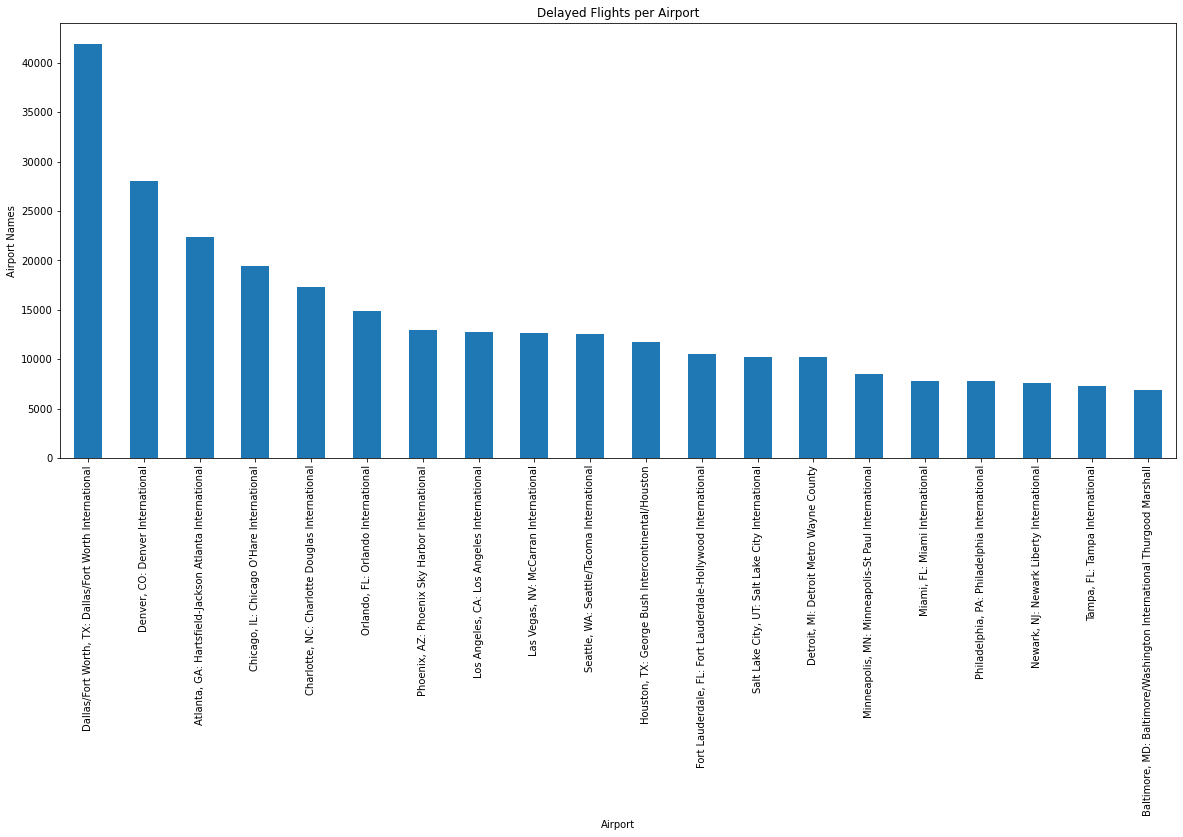

In [13]:
ax = (
    df
    .groupby('airport_name')
    .arr_del15
    .sum() 
    .sort_values(ascending=False) 
    .head(20) 
    .plot(
        kind='bar',
        figsize=(20,8),
        title='Delayed Flights per Airport',
    )
)
""
ax.set_xlabel('Airport')
ax.set_ylabel('Airport Names');

Another chart now showing us the Top 20 airports with the most amount of delays.  This time were using the .groupby() function calling the airport_name and the arr_del15 data, adding and sorting accordingly.  All of this is then displayed and labeled correctly using ax.set_xlabel and ax.set_ylabel.

## Bar Chart showing carrier delays

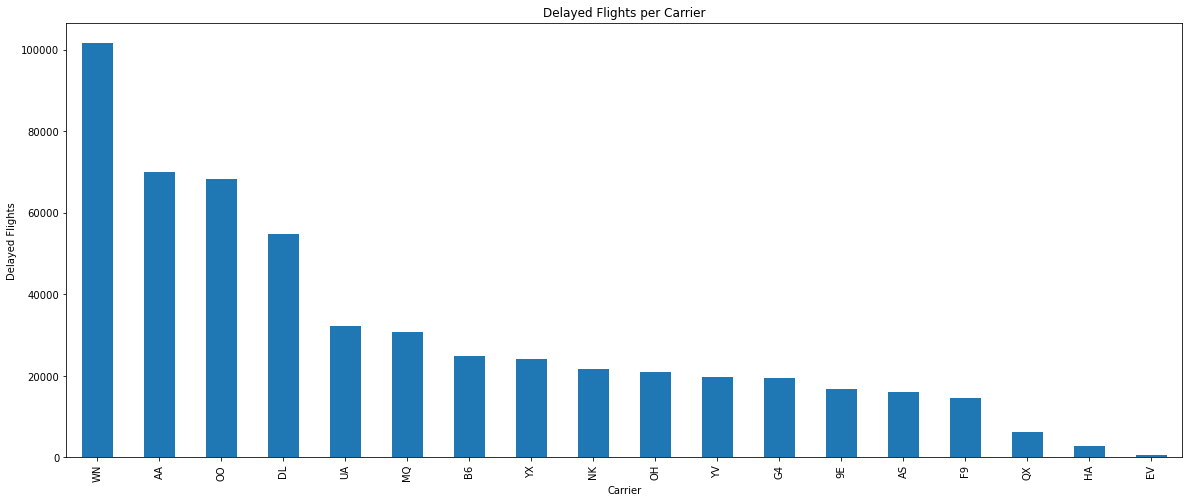

In [14]:
ax = (
    df
    .groupby('carrier')
    .arr_del15
    .sum() 
    .sort_values(ascending=False) 
    .head(20) 
    .plot(
        kind='bar',
        figsize=(20,8),
        title='Delayed Flights per Carrier',
    )
)

ax.set_xlabel('Carrier')
ax.set_ylabel('Delayed Flights');

Here we use the df().plot code to show us the carriers with the most amount of delays.  We have a total of 18 carriers in the dataset, ranging from the largest in The United States, to some of the smaller carrier companies.  We group the carrier and arr_del15 data to achieve this and sort accordingly.

## Displaying the number of diverted flights for each carrier and airport pair

In [15]:
pd.crosstab(df['carrier'], df['airport'], values=df['arr_diverted'], aggfunc='sum').fillna('')

airport,ABE,ABI,ABQ,ABR,ABY,ACK,ACT,ACV,ACY,ADK,...,VEL,VLD,VPS,WRG,WYS,XNA,XWA,YAK,YKM,YUM
carrier,,,,,,,,,,,,,,,,,,,,,
9E,1.0,,,,1.0,1.0,,,,,...,,8.0,1.0,,,2.0,,,,
AA,,,1.0,,,,,,,,...,,,1.0,,,,,,,
AS,,,1.0,,,,,,,0.0,...,,,,8.0,,,,20.0,,
B6,,,0.0,,,2.0,,,,,...,,,,,,,,,,
DL,,,0.0,,,,,,,,...,,,1.0,,,,,,,
EV,,,0.0,,,,,,,,...,,,0.0,,,0.0,,,,
F9,,,0.0,,,,,,,,...,,,,,,0.0,,,,
G4,6.0,,0.0,,,,,,,,...,,,7.0,,,2.0,,,,
HA,,,,,,,,,,,...,,,,,,,,,,


This is just a crosstab giving a general idea of how many flights get diverted per carrier per airport.  Any row that's missing data would mean that for that pair, there were no diverted flights.  We do this by calling the df['carrier'] column and df['airport'] columns, looking for the arr_diverted data and adding them up.  We use the .fillna('') code to leave any value that's empty, blank.

## Displaying the airlines with the most flight cancellations as a percentage of total arriving flights

In [16]:
df_flights = df.groupby('carrier_name')['arr_flights'].sum().reset_index(name='num_arrived')
df_cancelled = df.groupby('carrier_name')['arr_cancelled'].sum().reset_index(name='num_cancelled')
df_cancelled = pd.merge(df_cancelled, df_flights, on='carrier_name')

df_cancelled['proportion'] = df_cancelled['num_cancelled'] / df_cancelled['num_arrived'] * 100

df_cancelled.sort_values(by=['proportion'], ascending=False).head(10)

,carrier_name,num_cancelled,num_arrived,proportion
6,ExpressJet Airlines LLC,273.0,8484.0,3.217822
8,Hawaiian Airlines Inc.,1212.0,39520.0,3.066802
11,Mesa Airlines Inc.,3337.0,136141.0,2.451135
9,Horizon Air,1286.0,57133.0,2.250888
5,Envoy Air,4324.0,216689.0,1.995487
1,Allegiant Air,1944.0,101805.0,1.909533
15,Southwest Airlines Co.,13662.0,890384.0,1.534394
0,Alaska Airlines Inc.,1904.0,143994.0,1.322277
2,American Airlines Inc.,7004.0,553371.0,1.265697
10,JetBlue Airways,1673.0,139096.0,1.202766


Here were writing the code to be able to show the percentage of cancelled flights to total arrival flights and the proportion of this total.  We are using .groupby() and .merge() to create a variable named df_cancelled['proportion'] where we do the mathematic equation that gives us the data we need for the list.  We then use the sort_values() and .head() to display the Top 10.

## Showing the average number of delayed flights per airport

In [17]:
average_delay = df.groupby('airport')['arr_del15'].sum().mean()         # creating average_delay variable to use in showing the average delays per airport

print('Average Number of Delays per Airport: ' + str(average_delay))    # Displays the average number of delays per airport

Average Number of Delays per Airport: 1474.5108108108109


Here is a simple line of code that displays the average number of delays per airport.  We use the .groupby(), .sum() and .mean() functions to achieve this and the print() to display it.